In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, KFold
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import r2_score
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
training_data = pd.read_csv(r'C:\Users\Asus\Downloads/hip_fracture_training.csv')

In [4]:
training_data.head()

,HIP_PREOP_DEMENTIA,HIP_PREOP_DELIRIUM,HIP_PREOP_BONEMEDS,HIP_PREOP_MOBAID,HIP_PREOP_PRESSORE,HIP_MED_COMGMT,HIP_STDCARE,HIP_WBAT_POD1,HIP_DVT_28D,HIP_FRACTYPE,HIP_PATHFRAC,HIP_POST_PRESSORE,HIP_POST_DELIRIUM,HIP_POST_MOBAID,HIP_POST_BONEMEDS,SEX,RACE_NEW,ETHNICITY_HISPANIC,CPT,WORKRVU,INOUT,TRANST,AGE,OPERYR,DISCHDEST,ANESTHES,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,WNDINF,STEROID,WTLOSS,BLEEDIS,TRANSFUS,PRSEPIS,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE,EMERGNCY,ASACLAS,OPTIME,TOTHLOS,ADMQTR,HTOODAY,NSUPINFEC,SUPINFEC,SSSIPATOS,NWNDINFD,WNDINFD,DSSIPATOS,NORGSPCSSI,ORGSPCSSI,OSSIPATOS,NDEHIS,DEHIS,NOUPNEUMO,OUPNEUMO,PNAPATOS,NREINTUB,REINTUB,NPULEMBOL,PULEMBOL,NFAILWEAN,FAILWEAN,VENTPATOS,NRENAINSF,RENAINSF,NOPRENAFL,OPRENAFL,NURNINFEC,URNINFEC,UTIPATOS,NCNSCVA,CNSCVA,NCDARREST,CDARREST,NCDMI,CDMI,NOTHBLEED,OTHBLEED,NOTHDVT,OTHDVT,NOTHSYSEP,OTHSYSEP,SEPSISPATOS,NOTHSESHOCK,OTHSESHOCK,SEPSHOCKPATOS,RETURNOR,DOPTODIS,OTHCDIFF,GenderData_1,GenderData_2,GenderData_3,RaceData_4,RaceData_5,RaceData_Black,RaceData_7,RaceData_8,RaceData_9,RaceData_10,RaceData_11,Ethnicity_14,TransferStatus_15,TransferStatus_16,TransferStatus_17,TransferStatus_18,TransferStatus_19,TransferStatus_20,DispoLocationPost_21,DispoLocationPost_22,DispoLocationPost_23,DispoLocationPost_24,DispoLocationPost_25,DispoLocationPost_26,DispoLocationPost_27,DispoLocationPost_28,DispoLocationPost_29,DispoLocationPost_30,DispoLocationPost_31,DispoLocationPost_32,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,SSIPost_80,DeepSSIPost_81,OrganSpacePost_84,WoundDisruptionPost_86,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,VentPost_94,ProgRenalPost_96,AcuterenalPost_97,UTIPost_100,CardiacArrestPost_103,MIPost_105,BleedingTfnPost_108,DVTPost_109,SepsisPost_112,SepticShockPost_114,ReOPPost_116,BMI,ObesityBinary,CardiacComplications,InfectiousComplications,Stroke_2,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,MEDMGMT_13,MEDMGMT_14,MEDMGMT_15,StandardHip_17,WBATPOD1_18,WBATPOD1_21,DVTProphylaxisPost28_24,PostOpPRESSORE_26,PostOpDelirium_29,PostOpMobAid_33,PostOpBoneMed_35,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_49,PathologicHipFractures_50,PathologicHipFractures_51,MinorityPatient,DischargeNotHome,PartialorFullFuncStatus,DiabetesBinary,MFI5,READMISSION30D
0,No,No,No,No,No,Yes-co-management throughout stay,Yes,Yes,Yes,"Femoral neck fracture (subcapital, Garden type...",None,No,No,Yes,Yes,female,White,NaN,27236,17.61,Inpatient,Not transferred (admitted from home),73,2016,Rehab,Spinal,No,60,115,NO,No,No,Independent,No,No,No,No,No,No,No,No,No,No,No,No,No,None,139.0,17.0,0.67,11.6,36.4,252.0,No,2-Mild Disturb,101,5,4,1,0,No Complication,No,0,No Complication,No,0,No Complication,No,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,0,No Complication,0,No Complication,0,No Complication,0,No Complication,0,No Complication,No,0,No Complication,No,No,4,No Complication,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.456944,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,Yes,Yes,Yes,No,No,Yes-co-management throughout stay,No,Yes,No,"Femoral neck fracture (subcapital, Garden type...",None,No,Yes,Yes,Yes,female,White,NaN,27236,17.61,Inpatient,Not transferred (admitted from home),90,2016,"Skilled Care, Not Hom

In [5]:
training_data.shape

(29188, 219)

In [6]:
for col in training_data.columns:
    print(col)

HIP_PREOP_DEMENTIA
HIP_PREOP_DELIRIUM
HIP_PREOP_BONEMEDS
HIP_PREOP_MOBAID
HIP_PREOP_PRESSORE
HIP_MED_COMGMT
HIP_STDCARE
HIP_WBAT_POD1
HIP_DVT_28D
HIP_FRACTYPE
HIP_PATHFRAC
HIP_POST_PRESSORE
HIP_POST_DELIRIUM
HIP_POST_MOBAID
HIP_POST_BONEMEDS
SEX
RACE_NEW
ETHNICITY_HISPANIC
CPT
WORKRVU
INOUT
TRANST
AGE
OPERYR
DISCHDEST
ANESTHES
ELECTSURG
HEIGHT
WEIGHT
DIABETES
SMOKE
DYSPNEA
FNSTATUS2
VENTILAT
HXCOPD
ASCITES
HXCHF
HYPERMED
RENAFAIL
DIALYSIS
DISCANCR
WNDINF
STEROID
WTLOSS
BLEEDIS
TRANSFUS
PRSEPIS
PRSODM
PRBUN
PRCREAT
PRWBC
PRHCT
PRPLATE
EMERGNCY
ASACLAS
OPTIME
TOTHLOS
ADMQTR
HTOODAY
NSUPINFEC
SUPINFEC
SSSIPATOS
NWNDINFD
WNDINFD
DSSIPATOS
NORGSPCSSI
ORGSPCSSI
OSSIPATOS
NDEHIS
DEHIS
NOUPNEUMO
OUPNEUMO
PNAPATOS
NREINTUB
REINTUB
NPULEMBOL
PULEMBOL
NFAILWEAN
FAILWEAN
VENTPATOS
NRENAINSF
RENAINSF
NOPRENAFL
OPRENAFL
NURNINFEC
URNINFEC
UTIPATOS
NCNSCVA
CNSCVA
NCDARREST
CDARREST
NCDMI
CDMI
NOTHBLEED
OTHBLEED
NOTHDVT
OTHDVT
NOTHSYSEP
OTHSYSEP
SEPSISPATOS
NOTHSESHOCK
OTHSESHOCK
SEPSHOCKPATOS
RETURNO

In [7]:
full_cols = ['DeepSSIPost_81', 'OrganSpacePost_84', 'PneumoniaPost_88', 'ReintubPost_90', 'PulmEmbPost_92', 
    'ProgRenalPost_96', 'UTIPost_100', 'MIPost_105', 'BleedingTfnPost_108', 'DVTPost_109', 
    'DVTProphylaxisPost28_24','SepsisPost_112','ReOPPost_116', 'CardiacComplications', 
    'InfectiousComplications', 'Stroke_2', 'WBATPOD1_21', 'PostOpPRESSORE_26', 'PostOpDelirium_29', 
    'PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE', 
    'SmokePre_37', 'DyspneaPre_38', 'DyspneaPre_39', 'DyspneaPre_40', 
    'FncStatusPre_41', 'FncStatusPre_42', 'FncStatusPre_43', 'FncStatusPre_44', 
    'VentDepPre_46', 'COPDPre_48', 'AscitesPre_50', 'CHFPre_52', 'HTNPre_54', 
    'DialysisPre_56', 'CancerPre_58', 'WoundInfectionPre_60', 'SteroidPre_62', 
    'WtLossPre_64', 'BleedingDisPre_66', 'TfnPre_68', 'SepsisPre_69', 'SepsisPre_70', 
    'SepsisPre_71', 'SepsisPre_72', 'ASAPre_73', 'ASAPre_74', 'ASAPre_75', 'ASAPre_76', 
    'ASAPre_77', 'ASAPre_78', 'PreOpDementia_2', 'PreOpDelirium_5', 'PreOpBoneMeds_7', 
    'PreOpMOBAID_10', 'PreOpPressSore_12', 'PartialorFullFuncStatus', 'DiabetesBinary','MFI5', 
    'ObesityBinary', 'MinorityPatient', 'AGE', 'Ethnicity_14', 'GenderData_1', 'GenderData_2', 
    'GenderData_3', 'RaceData_4', 'RaceData_5', 'RaceData_Black', 
    'RaceData_7', 'RaceData_8', 'RaceData_9','RaceData_10', 'RaceData_11', 'TransferStatus_17', 
    'TransferStatus_18','DispoLocationPost_28','DispoLocationPost_30', 'MEDMGMT_14', 
    'StandardHip_17', 'HipFractureType_44','HipFractureType_45', 'HipFractureType_46', 
    'HipFractureType_47', 'HipFractureType_48','PathologicHipFractures_51', 
    'INOUT', 'EMERGNCY', 'OPTIME', 'TOTHLOS', 'HTOODAY','READMISSION30D']

def filter_data(df, cols): 

    #filters for only the preoperative columns
    df_full = df[cols]

    return df_full   

full_df = filter_data(training_data, full_cols)

In [8]:
full_df.head()

,DeepSSIPost_81,OrganSpacePost_84,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,ProgRenalPost_96,UTIPost_100,MIPost_105,BleedingTfnPost_108,DVTPost_109,DVTProphylaxisPost28_24,SepsisPost_112,ReOPPost_116,CardiacComplications,InfectiousComplications,Stroke_2,WBATPOD1_21,PostOpPRESSORE_26,PostOpDelirium_29,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,PartialorFullFuncStatus,DiabetesBinary,MFI5,ObesityBinary,MinorityPatient,AGE,Ethnicity_14,GenderData_1,GenderData_2,GenderData_3,RaceData_4,RaceData_5,RaceData_Black,RaceData_7,RaceData_8,RaceData_9,RaceData_10,RaceData_11,TransferStatus_17,TransferStatus_18,DispoLocationPost_28,DispoLocationPost_30,MEDMGMT_14,StandardHip_17,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_51,INOUT,EMERGNCY,OPTIME,TOTHLOS,HTOODAY,READMISSION30D
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,139.0,17.0,0.67,11.6,36.4,252.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,Inpatient,No,101,5,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,139.0,9.0,0.80,9.4,36.6,144.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,90,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,Inpatient,No,38,6,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,138.0,17.0,0.60,9.6,39.7,154.0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,90,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,Inpatient,Yes,71,4,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,137.0,22.0,1.10,6.5,43.0,234.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,69,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Inpatient,No,165,7,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,140.0,17.0,0.70,12.2,35.2,240.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,3,0,0,88,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,Inpatient,Yes,111,11,2,1


In [9]:
full_df.isnull().values.any()

False

In [10]:
full_df.isnull().sum()

DeepSSIPost_81       0
OrganSpacePost_84    0
PneumoniaPost_88     0
ReintubPost_90       0
PulmEmbPost_92       0
                    ..
EMERGNCY             0
OPTIME               0
TOTHLOS              0
HTOODAY              0
READMISSION30D       0
Length: 96, dtype: int64

<Axes: xlabel='READMISSION30D', ylabel='count'>

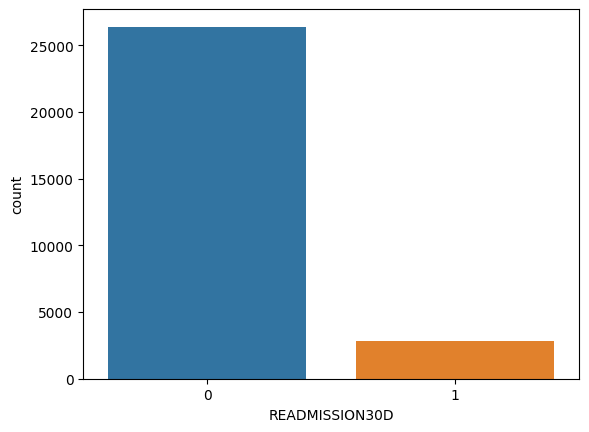

In [11]:
sns.countplot(x=full_df['READMISSION30D'], label = "Count")

In [12]:
#next we need to scale the lab values 
lab_cols = ['PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE']

def scale_labs(df, lab_cols):
    # create a DataFrame with only the lab columns
    lab_df = df[lab_cols]

    # replace missing values (-99) with NaN
    lab_df = lab_df.replace(-99, np.nan)

    # impute missing values with the median
    imputer = SimpleImputer(strategy='median')
    
    #transform lab values 
    lab_df = imputer.fit_transform(lab_df)

    # create a StandardScaler object
    scaler = StandardScaler()

    # fit the scaler to the lab data
    scaler.fit(lab_df)

    # transform the lab data
    scaled_data = scaler.transform(lab_df)

    # create a new DataFrame with the scaled lab data
    scaled_lab_df = pd.DataFrame(scaled_data, columns=lab_cols)

    # create a new DataFrame that contains both the scaled lab columns and the other columns from the input DataFrame
    new_df = pd.concat([df.drop(lab_cols, axis=1), scaled_lab_df], axis=1)

    return new_df


scaled_df  = scale_labs(full_df, lab_cols)

In [13]:
#convert these two to binary 
display(scaled_df['EMERGNCY'].value_counts())
display(scaled_df['INOUT'].value_counts())

No     23943
Yes     5245
Name: EMERGNCY, dtype: int64

Inpatient     29110
Outpatient       78
Name: INOUT, dtype: int64

In [14]:
#convert EMERGENCY and INOUT
def convert_binary(df): 
    encoding_EMERGENCY = {'No': 0, 'Yes': 1}
    encoding_INOUT = {'Inpatient': 1, 'Outpatient': 0}

    df['EMERGNCY'] = df['EMERGNCY'].map(encoding_EMERGENCY)
    df['INOUT'] = df['INOUT'].map(encoding_INOUT)
    df_encoded = df 
    return df_encoded

df_encoded = convert_binary(scaled_df)

In [15]:
#convert these two to binary 
display(df_encoded['EMERGNCY'].value_counts())
display(df_encoded['INOUT'].value_counts())

0    23943
1     5245
Name: EMERGNCY, dtype: int64

1    29110
0       78
Name: INOUT, dtype: int64

In [16]:
def split_data(df): 
    X = df.drop(labels = ['READMISSION30D'], axis = 1) 
    y = pd.DataFrame(df['READMISSION30D']) 
    X_train,X_test,y_train,y_test = train_test_split(X, y, stratify = y, test_size= .2, random_state= 0 )
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = split_data(df_encoded)
display(X_train.info()) 
display(X_test.info())
display(y_train.info())
display(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23350 entries, 12914 to 4404
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             23350 non-null  int64  
 1   OrganSpacePost_84          23350 non-null  int64  
 2   PneumoniaPost_88           23350 non-null  int64  
 3   ReintubPost_90             23350 non-null  int64  
 4   PulmEmbPost_92             23350 non-null  int64  
 5   ProgRenalPost_96           23350 non-null  int64  
 6   UTIPost_100                23350 non-null  int64  
 7   MIPost_105                 23350 non-null  int64  
 8   BleedingTfnPost_108        23350 non-null  int64  
 9   DVTPost_109                23350 non-null  int64  
 10  DVTProphylaxisPost28_24    23350 non-null  int64  
 11  SepsisPost_112             23350 non-null  int64  
 12  ReOPPost_116               23350 non-null  int64  
 13  CardiacComplications       23350 non-null  

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 28216 to 13720
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             5838 non-null   int64  
 1   OrganSpacePost_84          5838 non-null   int64  
 2   PneumoniaPost_88           5838 non-null   int64  
 3   ReintubPost_90             5838 non-null   int64  
 4   PulmEmbPost_92             5838 non-null   int64  
 5   ProgRenalPost_96           5838 non-null   int64  
 6   UTIPost_100                5838 non-null   int64  
 7   MIPost_105                 5838 non-null   int64  
 8   BleedingTfnPost_108        5838 non-null   int64  
 9   DVTPost_109                5838 non-null   int64  
 10  DVTProphylaxisPost28_24    5838 non-null   int64  
 11  SepsisPost_112             5838 non-null   int64  
 12  ReOPPost_116               5838 non-null   int64  
 13  CardiacComplications       5838 non-null   

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23350 entries, 12914 to 4404
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   READMISSION30D  23350 non-null  int64
dtypes: int64(1)
memory usage: 364.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 28216 to 13720
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   READMISSION30D  5838 non-null   int64
dtypes: int64(1)
memory usage: 91.2 KB


None

In [17]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score,recall_score, precision_recall_curve

log_clf = LogisticRegression(penalty= 'l1', solver= 'liblinear',random_state=42)

log_clf.fit(X_train,y_train)
# test
y_pred = log_clf.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')



c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.9225762247344981
Confusion Matrix: 
[[5226   51]
 [ 401  160]]
Area Under Curve: 0.6377702044691979
Recall score: 0.28520499108734404


In [18]:
# Balanced Weighting

log_clf2 = LogisticRegression(class_weight='balanced',penalty= 'l1', solver= 'liblinear',random_state=42)

log_clf2.fit(X_train,y_train)
# test
y_pred2 = log_clf2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred2)}')
print(f'Recall score: {recall_score(y_test,y_pred2)}')


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.8225419664268585
Confusion Matrix: 
[[4466  811]
 [ 225  336]]
Area Under Curve: 0.7226223374770343
Recall score: 0.5989304812834224


In [35]:
# Weighted Grid Search
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

# define model
log_clf3 = LogisticRegression(penalty= 'l1', solver= 'liblinear',random_state=42)
# define evaluation procedure
grid = GridSearchCV(log_clf3,hyperparam_grid,scoring="roc_auc", n_jobs=-1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best score: 0.7963274781192383 with param: {'class_weight': {0: 1.0, 1: 100}}


In [34]:
# define model
log_clf4 = LogisticRegression(class_weight={0: 0.9, 1: 10},penalty= 'l1', solver= 'liblinear',random_state=42)
# fit it
log_clf4.fit(X_train,y_train)
# test
y_pred3 = log_clf4.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred3)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred3)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred3)}')
print(f'Recall score: {recall_score(y_test,y_pred3)}')

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.7881123672490579
Confusion Matrix: 
[[4244 1033]
 [ 204  357]]
Area Under Curve: 0.7203042362223715
Recall score: 0.6363636363636364


In [36]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [49]:
log_clf5 = LogisticRegression(C = 0.1,class_weight={0: 1, 1: 10}, penalty= 'l1', solver= 'liblinear',random_state=42)

# fit it
log_clf5.fit(X_train_pca,y_train)
# test
y_pred5 = log_clf5.predict(X_test_pca)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred5)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred5)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred5)}')
print(f'Recall score: {recall_score(y_test,y_pred5)}')

Accuracy Score: 0.35080507022953067
Confusion Matrix: 
[[1642 3635]
 [ 155  406]]
Area Under Curve: 0.5174346548790585
Recall score: 0.7237076648841355


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
